In [1]:
import sys
import os
sys.path.append('..')
os.chdir('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_processing import load_and_clean_data

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

df = load_and_clean_data()
print(f"Loaded {len(df):,} customers")

[2026-02-20 15:33:27,415] INFO: DataProcessor initialized
[2026-02-20 15:33:27,968] INFO: Successfully loaded data from data/raw/telco_customer_churn.csv
[2026-02-20 15:33:27,970] INFO: Dataset shape: (7043, 21)
[2026-02-20 15:33:27,972] INFO: Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
[2026-02-20 15:33:27,978] INFO: Starting data cleaning...
[2026-02-20 15:33:28,099] INFO: Dropped 0 rows with missing values
[2026-02-20 15:33:28,504] INFO: Removed 0 duplicate rows
[2026-02-20 15:33:28,716] INFO: Churn distribution:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64
[2026-02-20 15:33:28,719] INFO: Data cleaning complete. Final shape: (7043, 21)


Loaded 7,043 customers


## Churn by Demographics

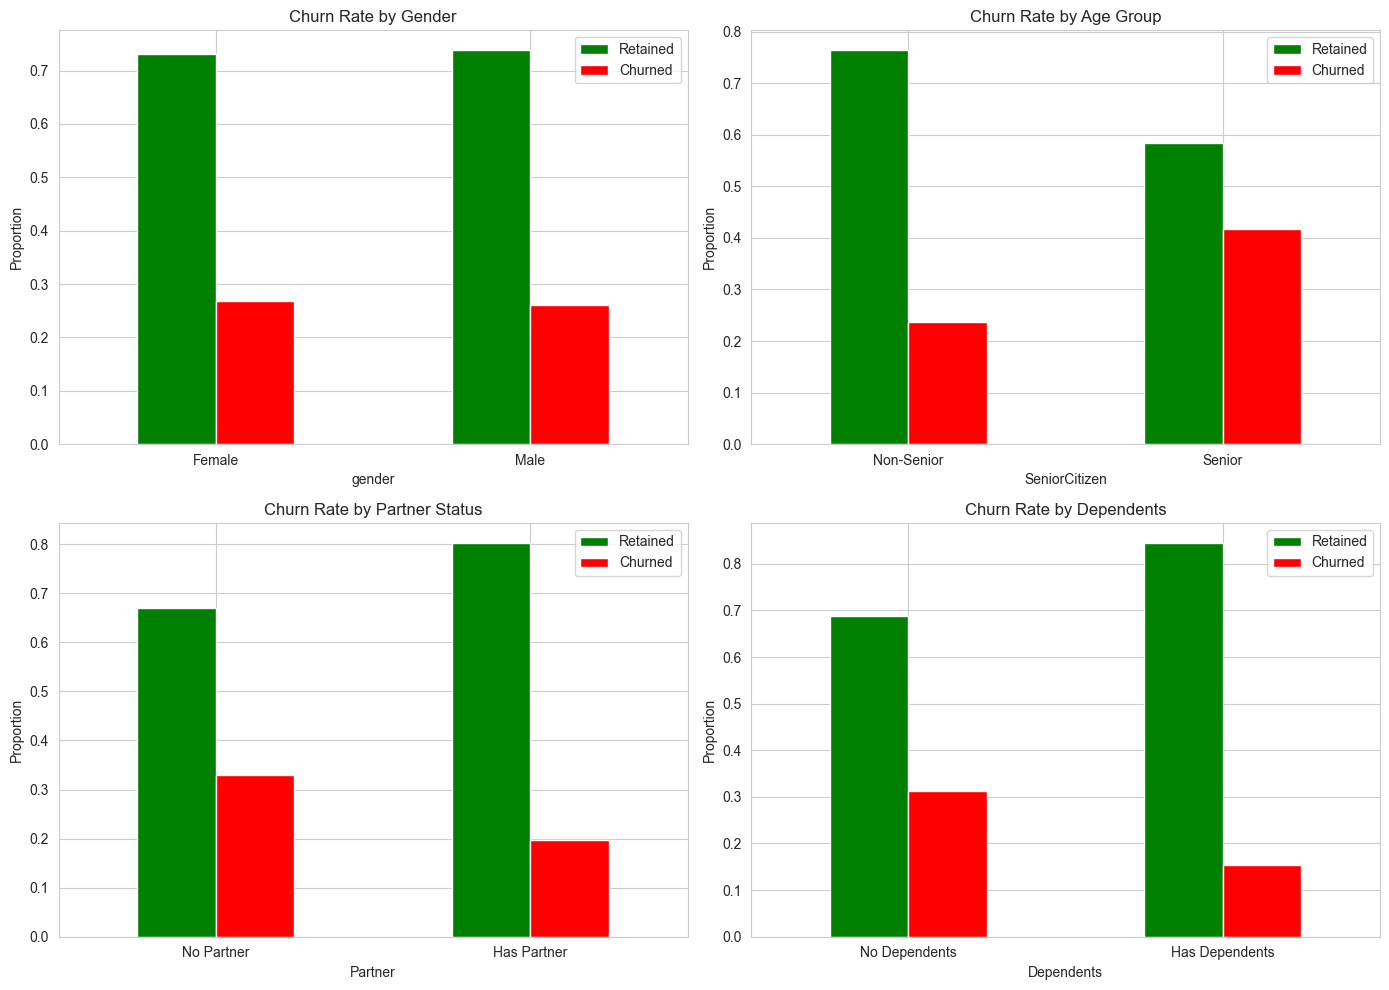

In [2]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

pd.crosstab(df['gender'], df['Churn'], normalize='index').plot(kind='bar', ax=axes[0,0], color=['green', 'red'])
axes[0,0].set_title('Churn Rate by Gender')
axes[0,0].set_ylabel('Proportion')
axes[0,0].set_xticklabels(['Female', 'Male'], rotation=0)
axes[0,0].legend(['Retained', 'Churned'])


pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index').plot(kind='bar', ax=axes[0,1], color=['green', 'red'])
axes[0,1].set_title('Churn Rate by Age Group')
axes[0,1].set_ylabel('Proportion')
axes[0,1].set_xticklabels(['Non-Senior', 'Senior'], rotation=0)
axes[0,1].legend(['Retained', 'Churned'])


pd.crosstab(df['Partner'], df['Churn'], normalize='index').plot(kind='bar', ax=axes[1,0], color=['green', 'red'])
axes[1,0].set_title('Churn Rate by Partner Status')
axes[1,0].set_ylabel('Proportion')
axes[1,0].set_xticklabels(['No Partner', 'Has Partner'], rotation=0)
axes[1,0].legend(['Retained', 'Churned'])


pd.crosstab(df['Dependents'], df['Churn'], normalize='index').plot(kind='bar', ax=axes[1,1], color=['green', 'red'])
axes[1,1].set_title('Churn Rate by Dependents')
axes[1,1].set_ylabel('Proportion')
axes[1,1].set_xticklabels(['No Dependents', 'Has Dependents'], rotation=0)
axes[1,1].legend(['Retained', 'Churned'])

plt.tight_layout()
plt.show()

## Churn by Contract Type

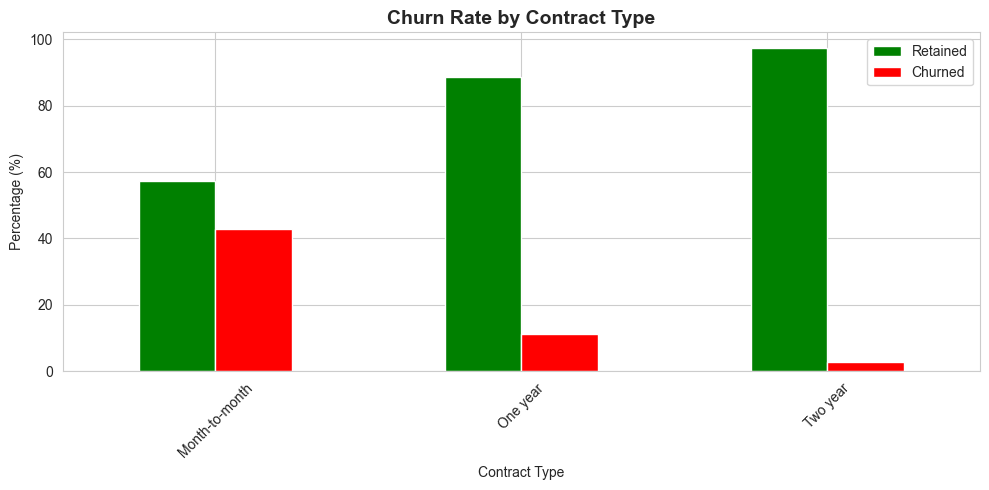


Churn rates by contract:
Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: 1, dtype: float64


In [3]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

contract_churn.plot(kind='bar', color=['green', 'red'], figsize=(10, 5))
plt.title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(['Retained', 'Churned'])
plt.tight_layout()
plt.show()

print("\nChurn rates by contract:")
print(contract_churn[1].sort_values(ascending=False))

## Churn by Tenure

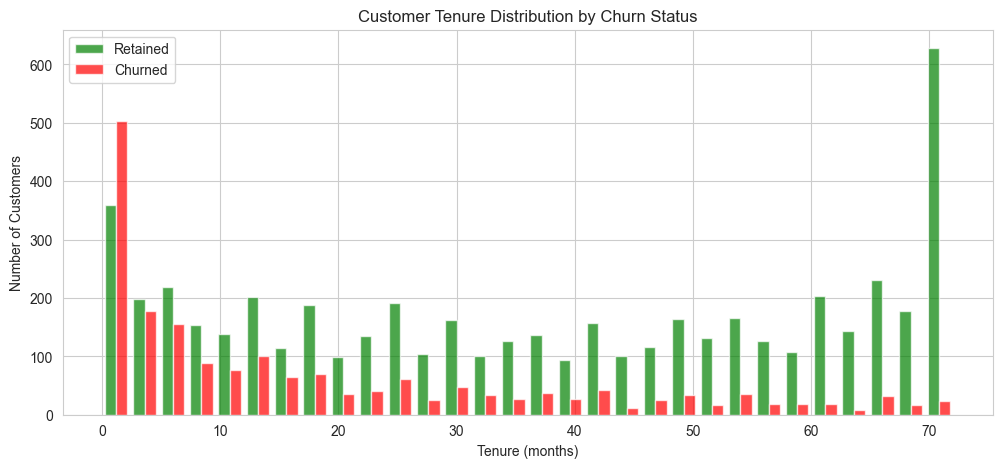

Average tenure (Churned): 18.0 months
Average tenure (Retained): 37.6 months


In [4]:
churned = df[df['Churn'] == 1]['tenure']
retained = df[df['Churn'] == 0]['tenure']

plt.figure(figsize=(12, 5))
plt.hist([retained, churned], bins=30, label=['Retained', 'Churned'], color=['green', 'red'], alpha=0.7)
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.title('Customer Tenure Distribution by Churn Status')
plt.legend()
plt.show()

print(f"Average tenure (Churned): {churned.mean():.1f} months")
print(f"Average tenure (Retained): {retained.mean():.1f} months")

##  Churn by Monthly Charges

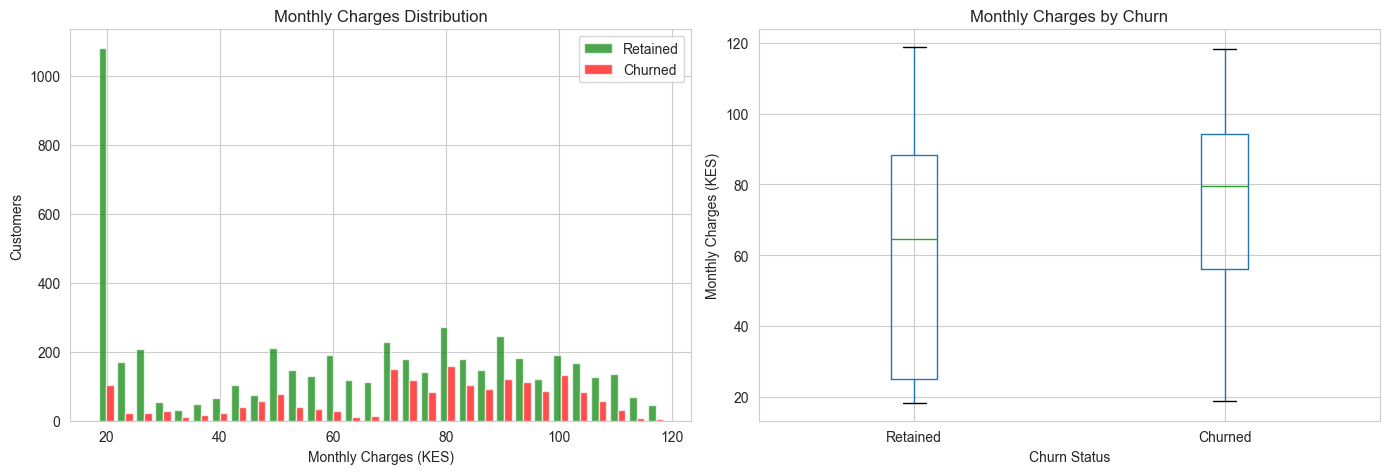

Average charges (Churned): KES 74.44
Average charges (Retained): KES 61.27


In [5]:
churned_charges = df[df['Churn'] == 1]['MonthlyCharges']
retained_charges = df[df['Churn'] == 0]['MonthlyCharges']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution
axes[0].hist([retained_charges, churned_charges], bins=30, label=['Retained', 'Churned'], color=['green', 'red'], alpha=0.7)
axes[0].set_xlabel('Monthly Charges (KES)')
axes[0].set_ylabel('Customers')
axes[0].set_title('Monthly Charges Distribution')
axes[0].legend()

# Box plot
df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[1])
axes[1].set_xlabel('Churn Status')
axes[1].set_ylabel('Monthly Charges (KES)')
axes[1].set_title('Monthly Charges by Churn')
axes[1].set_xticklabels(['Retained', 'Churned'])
plt.suptitle('')

plt.tight_layout()
plt.show()

print(f"Average charges (Churned): KES {churned_charges.mean():.2f}")
print(f"Average charges (Retained): KES {retained_charges.mean():.2f}")

## Churn by Services

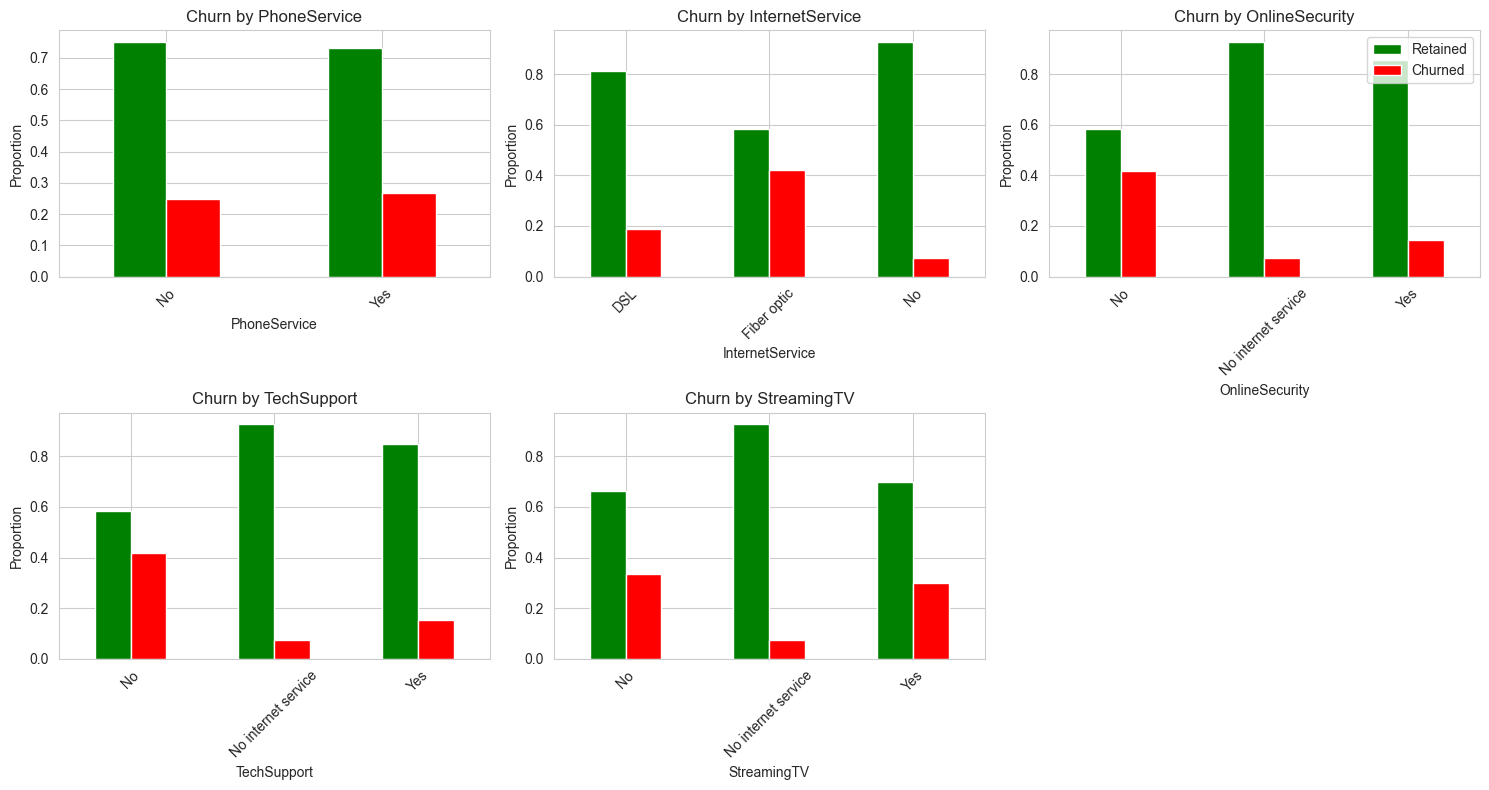

In [6]:
services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, service in enumerate(services):
    pd.crosstab(df[service], df['Churn'], normalize='index').plot(
        kind='bar', ax=axes[i], color=['green', 'red'], legend=False
    )
    axes[i].set_title(f'Churn by {service}')
    axes[i].set_ylabel('Proportion')
    axes[i].tick_params(axis='x', rotation=45)

axes[-1].axis('off')
axes[2].legend(['Retained', 'Churned'], loc='upper right')

plt.tight_layout()
plt.show()

## Correlation Analysis

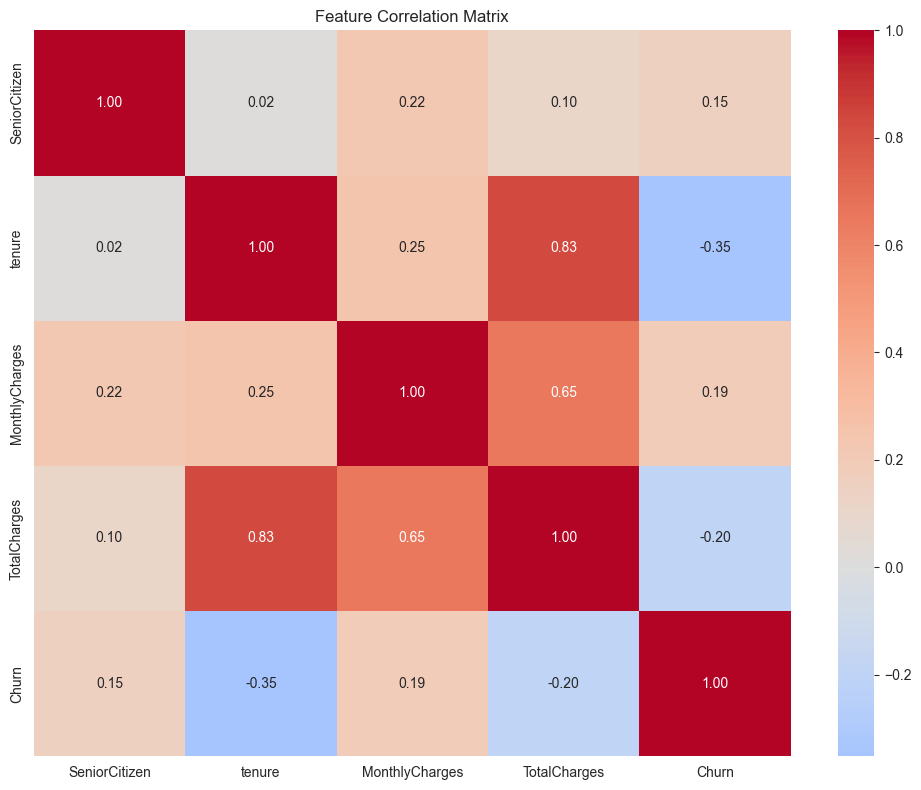

In [7]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()